<a href="https://colab.research.google.com/github/pradyumna4998/Intro-to-ML/blob/main/Intro_to_ML_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : V.pradyumna

Student ID : 801345963

Homework Number : 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from matplotlib import markers


Function to load data from a URL

In [2]:

def load_data(url):
    response = requests.get(url)
    data = pd.read_csv(StringIO(response.text))
    return data

Loading the data from the Github URL

In [5]:
# Load the data from the GitHub URL
github_url = "https://raw.githubusercontent.com/pradyumna4998/Intro-to-ML/main/D3.csv"
data = load_data(github_url)
display(data)

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375
...,...,...,...,...
95,3.838384,1.460202,3.046061,-4.440595
96,3.878788,2.155152,3.494545,-4.458663
97,3.919192,2.850101,3.943030,-4.479995
98,3.959596,3.545051,0.391515,-3.304593


Map column names to match with the variable names used in code

In [6]:

data = data.rename(columns={'X1': 'x1', 'X2': 'x2', 'X3': 'x3', 'Y': 'y'})

# Separate explanatory variables
x1 = data['x1']
x2 = data['x2']
x3 = data['x3']
y = data['y']
m=len(x1)
print(m)

100


Gradient Descent function and Loss Function

In [7]:
def gradient_descent(X, Y, initial_theta, learning_rate, num_iterations):
    m = len(Y)
    theta = initial_theta
    losses = []

    for i in range(num_iterations):
        predictions = X.dot(theta)
        error = predictions - Y
        gradient = (X.T.dot(error) / m)
        theta -= learning_rate * gradient
        loss = np.sum(error**2) / (2 * m)
        losses.append(loss)

    return theta, losses


Problem 1 - Linear Regression for Each Explanatory Variable Individually


In [8]:
learning_rate = 0.01
num_iterations = 5000
initial_theta = np.zeros(2)
print(initial_theta)


[0. 0.]


In [9]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
print('Final theta for X1 and Y:', theta1)
print('Final cost for X1 and Y =', cost_history1)

Final theta for X1 and Y: [ 5.92785998 -2.03830202]
Final cost for X1 and Y = [5.524438459196242, 5.4822671506377505, 5.442909653150663, 5.4060408688278345, 5.37137434491193, 5.3386576750109604, 5.307668447592466, 5.278210676627332, 5.250111657004879, 5.223219194169255, 5.1973991634427845, 5.1725333598018395, 5.148517603539863, 5.125260071365583, 5.102679826108516, 5.080705521396407, 5.059274260482047, 5.038330590874891, 5.017825618615978, 4.997716227958004, 4.977964393906743, 4.958536576572887, 4.939403187598378, 4.920538120080047, 4.901918334434012, 4.883523493543612, 4.865335641325883, 4.847338919549531, 4.829519318352298, 4.811864456447284, 4.794363387485139, 4.77700642945939, 4.759785014412683, 4.742691556028028, 4.725719332976612, 4.708862386147121, 4.692115428104538, 4.675473763323111, 4.6589332179112555, 4.642490077698859, 4.626141033691764, 4.60988313401675, 4.5937137415845894, 4.577630496790692, 4.561631284653873, 4.545714205865046, 4.5298775512805785, 4.514119779450369, 4.49

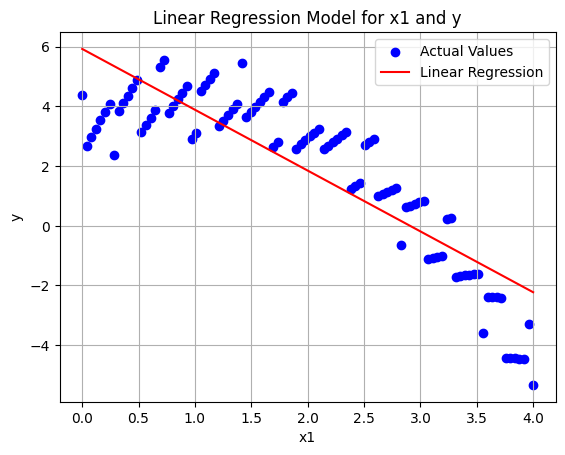

In [10]:
plt.scatter(x1, y, label='Actual Values', color='blue')
plt.plot(x1, np.column_stack((np.ones(len(x1)), x1)).dot(theta1), label='Linear Regression', color='red')
plt.grid(linestyle='-')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Linear Regression Model for x1 and y')
plt.legend()
plt.show()



In [11]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
print('Final theta for X2 and Y:', theta2)
print('cost_history for X2 and Y =', cost_history2)

Final theta for X2 and Y: [0.73614253 0.55757565]
cost_history for X2 and Y = [8.182403599005609, 8.06106499912682, 7.952288998482203, 7.854588904890693, 7.7666549119947215, 7.687333049267685, 7.615606637058188, 7.550579948561112, 7.491463816081973, 7.4375629502155425, 7.388264768094697, 7.3430295511238475, 7.301381773982686, 7.2629024655141965, 7.227222478698328, 7.194016561526374, 7.162998133465496, 7.13391468354518, 7.106543716090058, 7.080689178926858, 7.056178316649017, 7.032858898355365, 7.010596775298845, 6.989273729184631, 6.968785576529142, 6.949040498607592, 6.929957570144174, 6.911465463093597, 6.893501304677435, 6.876009671318252, 6.858941702299194, 6.84225431890111, 6.825909536465026, 6.809873858321421, 6.794117741843829, 6.778615128043658, 6.763343027144591, 6.7482811534747125, 6.733411603807417, 6.718718573980446, 6.704188109237838, 6.689807884281624, 6.675567009497678, 6.661455860240876, 6.647465926435459, 6.633589680072946, 6.619820458477773, 6.6061523614641935, 6.5925

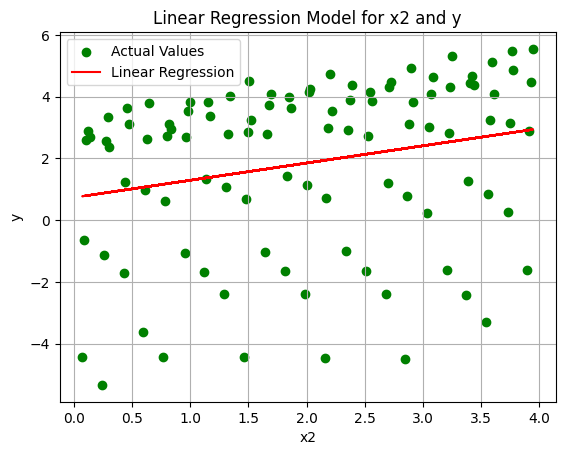

In [12]:
plt.scatter(x2, y, label='Actual Values', color='green')
plt.plot(x2, np.column_stack((np.ones(len(x2)), x2)).dot(theta2), label='Linear Regression', color='red')
plt.grid(linestyle='-')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Linear Regression Model for x2 and y')
plt.legend()
plt.show()

In [13]:
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)
print('Final theta for X3 and Y:', theta3)
print('cost_history for X3 and Y =', cost_history3)


Final theta for X3 and Y: [ 2.87139341 -0.52047154]
cost_history for X3 and Y = [4.407830865792402, 4.388730216571164, 4.37151876055964, 4.3559795945141335, 4.341920876123181, 4.329172927762379, 4.317585674966053, 4.307026380932802, 4.29737764285249, 4.288535619796161, 4.280408465407324, 4.272914941725866, 4.265983193211204, 4.2595496624505955, 4.253558131178121, 4.247958872122314, 4.24270789887401, 4.237766302446318, 4.2330996645077645, 4.228677538427526, 4.224472990295785, 4.220462192987914, 4.216624067142235, 4.212939963629622, 4.209393382719736, 4.205969725702901, 4.202656075216733, 4.199441000960167, 4.19631438786084, 4.1932672841009335, 4.19029176670645, 4.187380822670117, 4.184528243812727, 4.181728533795153, 4.178976825876804, 4.17626881017858, 4.1736006693518535, 4.170969021682057, 4.168370870767622, 4.165803561014369, 4.163264738273279, 4.160752315027224, 4.158264439600913, 4.155799468929126, 4.153355944471995, 4.1509325709136276, 4.148528197322401, 4.14614180048845, 4.143772

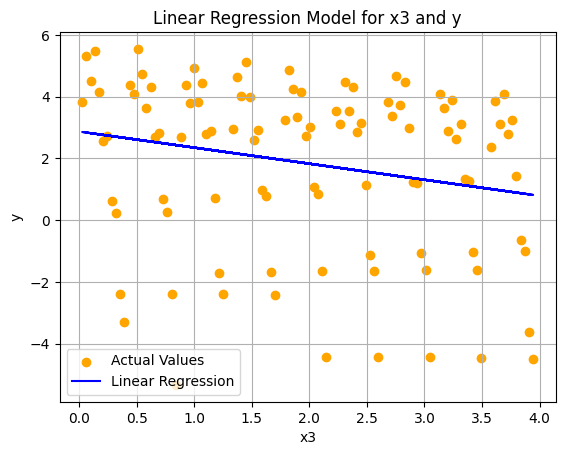

In [14]:
plt.scatter(x3, y, label='Actual Values', color='orange')
plt.plot(x3, np.column_stack((np.ones(len(x3)), x3)).dot(theta3), label='Linear Regression', color='blue')
plt.grid(linestyle='-')
plt.xlabel('x3')
plt.ylabel('y')
plt.title('Linear Regression Model for x3 and y')
plt.legend()
plt.show()

Taking different learning rates for X1, X2 and X3 and plotting Loss Function

First Learning rate was 0.01

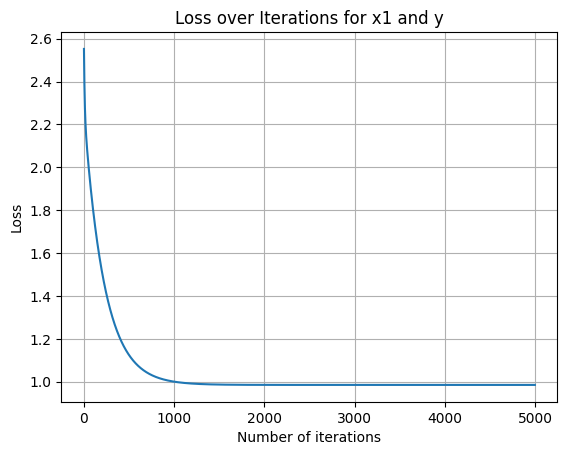

In [15]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()


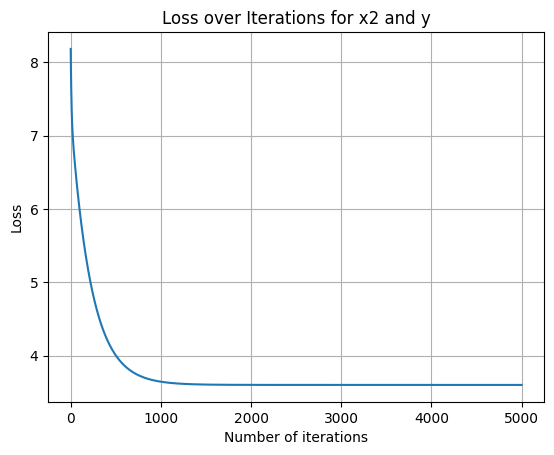

In [16]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history2)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x2 and y')
plt.show()


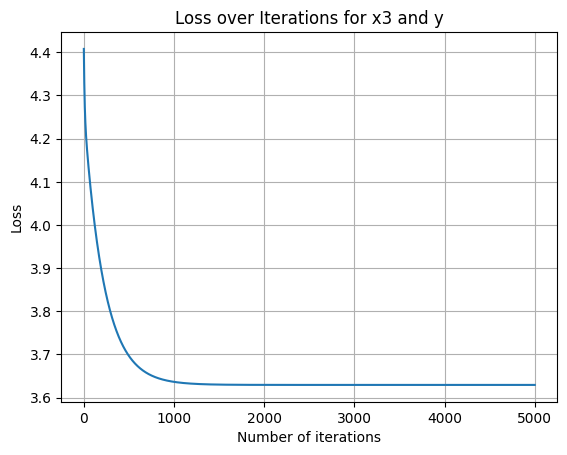

In [17]:
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history3)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x3 and y')
plt.show()


Next taking learning rate as 0.04

In [18]:
learning_rate = 0.04
num_iterations = 2000
initial_theta = np.zeros(2)
print(initial_theta)


[0. 0.]


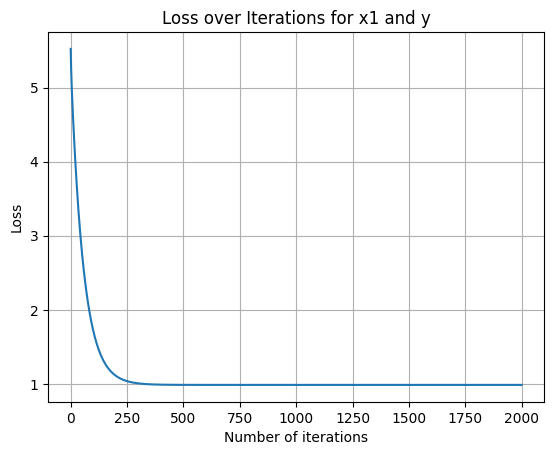

In [19]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()


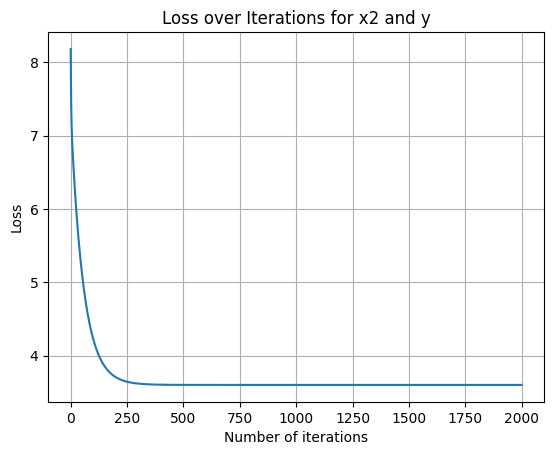

In [20]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history2)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x2 and y')
plt.show()


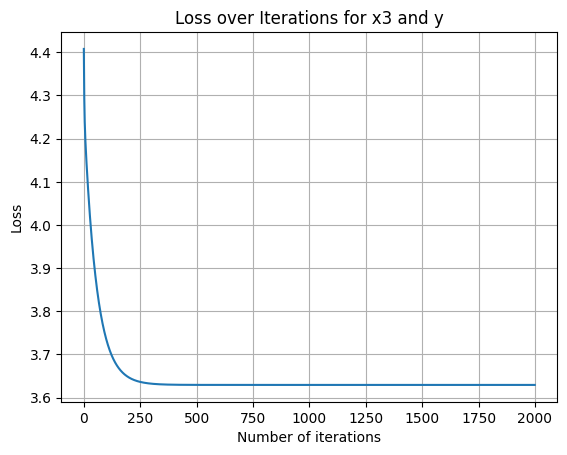

In [21]:
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history3)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x3 and y')
plt.show()



Next taking learning rate as 0.2

In [22]:
learning_rate = 0.2
num_iterations = 1000
initial_theta = np.zeros(2)
print(initial_theta)



[0. 0.]


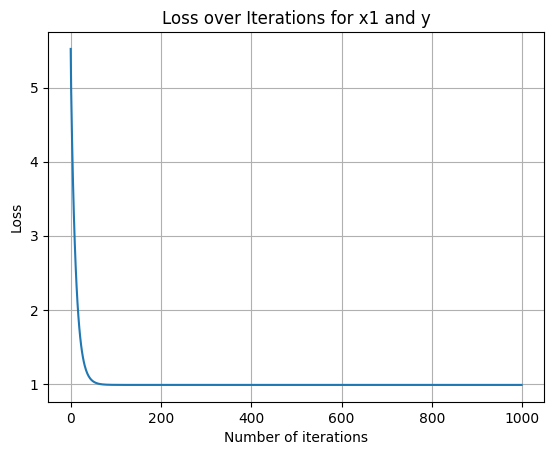

In [23]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()



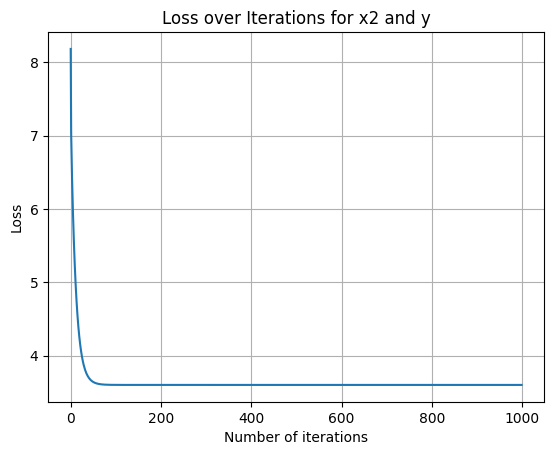

In [24]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history2)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x2 and y')
plt.show()


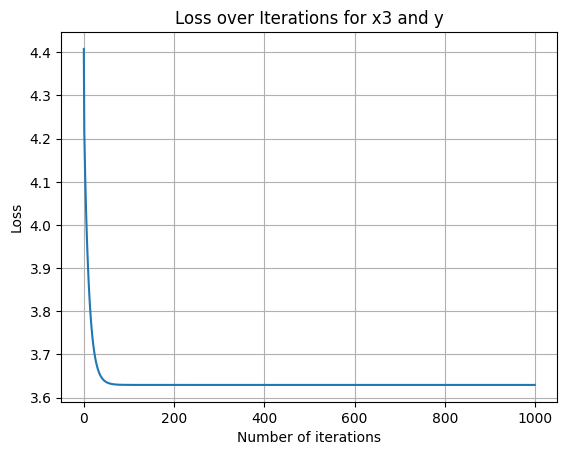

In [25]:
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history3)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x3 and y')
plt.show()


Next taking learning rate very high 0.6

In [26]:
learning_rate = 0.6
num_iterations = 100
initial_theta = np.zeros(2)
print(initial_theta)


[0. 0.]


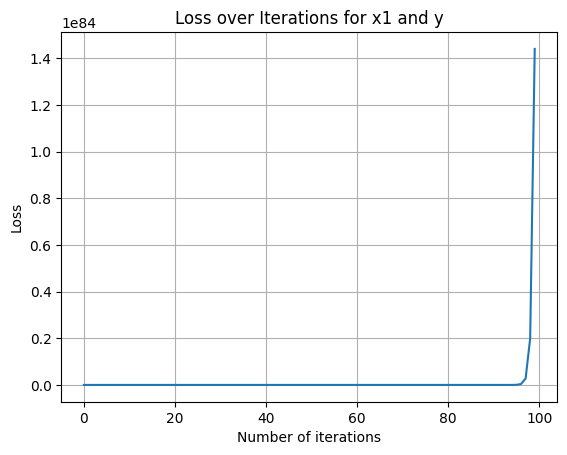

In [27]:
theta1, cost_history1 = gradient_descent(np.column_stack((np.ones(len(x1)), x1)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history1)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x1 and y')
plt.show()


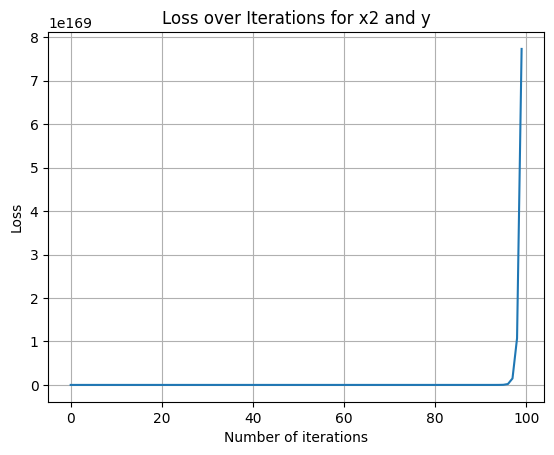

In [28]:
theta2, cost_history2 = gradient_descent(np.column_stack((np.ones(len(x2)), x2)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history2)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x2 and y')
plt.show()


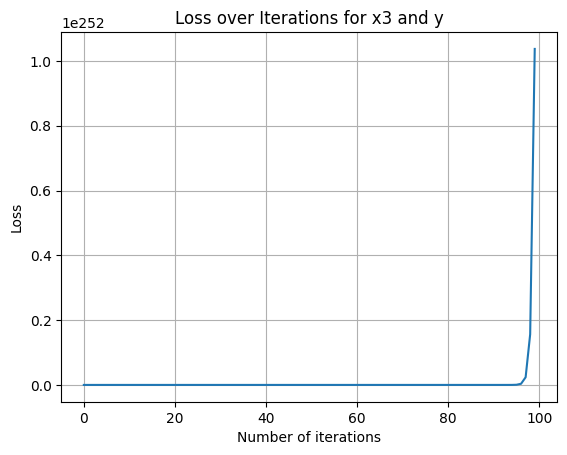

In [29]:
theta3, cost_history3 = gradient_descent(np.column_stack((np.ones(len(x3)), x3)), y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history3)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for x3 and y')
plt.show()


Problem 2 - Linear Regression with All Explanatory Variables

Final theta for X1, X2, X3, and Y: [ 5.30113037 -2.0018776   0.53471759 -0.26369094]


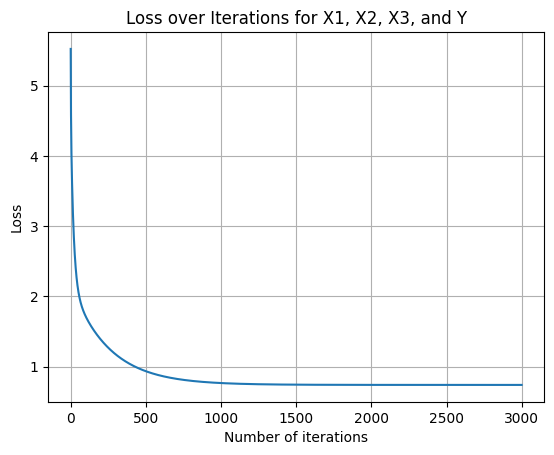

Predicted values for new inputs: [3.57027942 0.24261142 0.10124179]


In [30]:

learning_rate = 0.02
num_iterations = 3000
initial_theta = np.zeros(4)

X = np.column_stack((np.ones(len(x1)), x1, x2, x3))
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
print('Final theta for X1, X2, X3, and Y:', theta4)
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for X1, X2, X3, and Y')
plt.show()

# Predict values for new inputs
test_data = np.array([[1, 1, 1, 1], [1, 2, 0, 4], [1, 3, 2, 1]])
predictions = test_data.dot(theta4)
print("Predicted values for new inputs:", predictions)


In [31]:
learning_rate = 0.04
num_iterations = 1000
initial_theta = np.zeros(4)

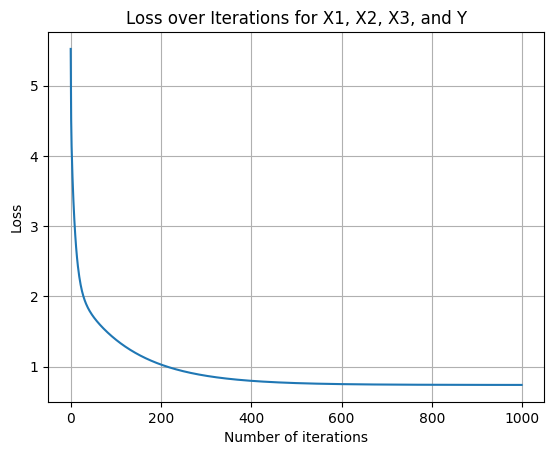

In [32]:
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for X1, X2, X3, and Y')
plt.show()

In [33]:
learning_rate = 0.2
num_iterations = 500
initial_theta = np.zeros(4)

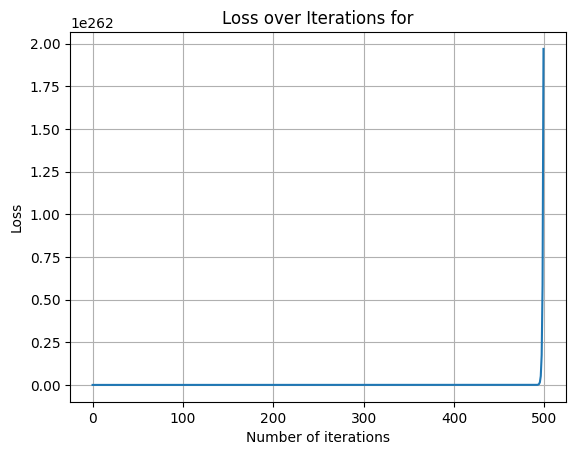

In [34]:
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations for')
plt.show()

In [35]:
learning_rate = 0.6
num_iterations = 100
initial_theta = np.zeros(4)

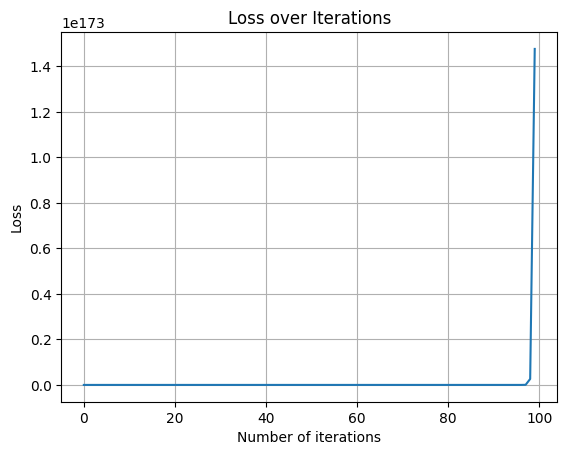

In [36]:
theta4, cost_history4 = gradient_descent(X, y, initial_theta, learning_rate, num_iterations)
plt.plot(cost_history4)
plt.grid(linestyle='-')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()